In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv')

In [3]:
df.head() 

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
df.tail() 

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470
99999,1.237661e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343152e+18,GALAXY,0.542944,7410,57104,851


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
df.isnull().sum() 

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [7]:
df.corr() 

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,-0.046997,0.031498,0.239461,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002553,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112329,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039443,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655245,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661641,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239460,0.065400,0.239459,0.262687,0.067165
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe() 

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [9]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [10]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [ ]:
df.drop(['obj_ID','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1, inplace=True)

In [13]:
df["class"]=df["class"].map({"GALAXY":0,"STAR":1,"QSO":2})

In [14]:
df.corr()

,alpha,delta,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD
alpha,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.002553,0.004552,0.001667,-0.002554,0.019943
delta,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,0.112329,0.056643,0.031638,0.112329,0.107333
u,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.029997,-0.017701,0.014309,0.029997,0.031997
g,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.039443,-0.005915,0.022954,0.039443,0.040274
r,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.655245,0.150691,0.433241,0.655243,0.671180
i,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.661641,0.284396,0.492383,0.661640,0.672523
z,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.037813,0.017352,0.030380,0.037813,0.037469
spec_obj_ID,-0.002553,0.112329,0.029997,0.039443,0.655245,0.661641,0.037813,1.000000,0.215722,0.388642,1.000000,0.970167
class,0.004552,0.056643,-0.017701,-0.005915,0.150691,0.284396,0.017352,0.215722,1.000000,0.536822,0.215722,0.207262
redshift,0.001667,0.031638,0.014309,0.022954,0.433241,0.492383,0.030380,0.388642,0.536822,1.000000,0.388641,0.387109


In [15]:
outliers = df.quantile(.97)
df = df[(df['redshift']<outliers['redshift'])]
df = df[(df['i']<outliers['i'])]
df = df[(df['plate']<outliers['plate'])]

In [16]:
x = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values
sm = SMOTE(random_state=42)
x, y = sm.fit_resample(x, y)

In [17]:
scalar = StandardScaler()
scale = scalar.fit_transform(x)

In [18]:
x,y=df.drop("class",axis=1),df[['class']]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

0.7293738389247076
              precision    recall  f1-score   support

           0       0.76      0.91      0.83     11520
           1       0.71      0.50      0.59      4104
           2       0.49      0.31      0.38      2678

    accuracy                           0.73     18302
   macro avg       0.65      0.57      0.60     18302
weighted avg       0.71      0.73      0.71     18302



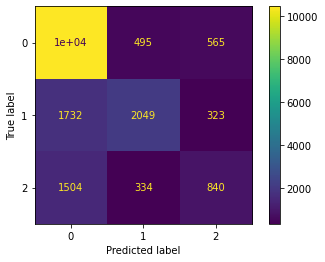

In [28]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
print(accuracy_score(KNN.predict(x_test),y_test))
print(classification_report(y_test, KNN.predict(x_test)))
plot_confusion_matrix(KNN,x_test,y_test)
plt.show()

0.6294394055294503
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     11520
           1       0.00      0.00      0.00      4104
           2       0.00      0.00      0.00      2678

    accuracy                           0.63     18302
   macro avg       0.21      0.33      0.26     18302
weighted avg       0.40      0.63      0.49     18302



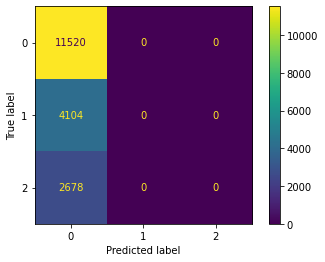

In [29]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
print(accuracy_score(LR.predict(x_test),y_test))
print(classification_report(y_test, LR.predict(x_test)))
plot_confusion_matrix(LR,x_test,y_test)
plt.show()

0.970385750191236
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11520
           1       1.00      1.00      1.00      4104
           2       0.90      0.91      0.91      2678

    accuracy                           0.97     18302
   macro avg       0.96      0.96      0.96     18302
weighted avg       0.97      0.97      0.97     18302



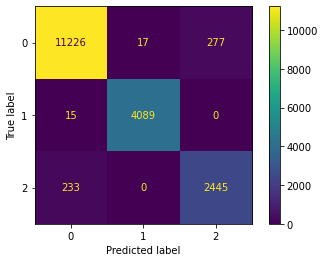

In [30]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
print(accuracy_score(DT.predict(x_test),y_test))
print(classification_report(y_test, DT.predict(x_test)))
plot_confusion_matrix(DT,x_test,y_test)
plt.show()

0.9815320729974866
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     11520
           1       0.99      1.00      1.00      4104
           2       0.96      0.92      0.94      2678

    accuracy                           0.98     18302
   macro avg       0.98      0.97      0.97     18302
weighted avg       0.98      0.98      0.98     18302



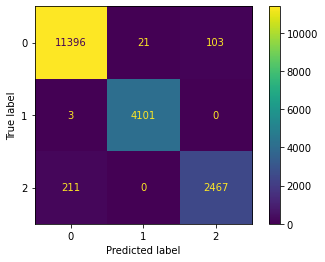

In [31]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
print(accuracy_score(RF.predict(x_test),y_test))
print(classification_report(y_test, RF.predict(x_test)))
plot_confusion_matrix(RF,x_test,y_test)
plt.show()

Text(0, 0.5, 'Score')

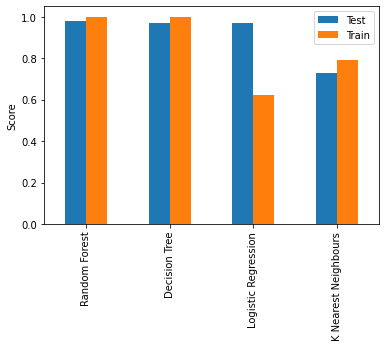

In [32]:
data= {'Decision Tree': {'Train': DT.score(x_train, y_train), 'Test': DT.score(x_test, y_test)},
        'Random Forest': {'Train': RF.score(x_train, y_train), 'Test': RF.score(x_test, y_test)},
       'Logistic Regression': {'Train': LR.score(x_train, y_train), 'Test': DT.score(x_test, y_test)},
      'K Nearest Neighbours': {'Train': KNN.score(x_train, y_train), 'Test': KNN.score(x_test, y_test)},
      }
df = pd.DataFrame(data)
df = df.T
df ['sum'] = df.sum(axis=1)
df.sort_values('sum', ascending=False)[['Test','Train']].plot.bar() 
plt.ylabel('Score')
